# DSI Instructor Challenge
- Author: Patrick Wales-Dinan

# Part I

In [1]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV, LogisticRegression, SGDClassifier
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, PowerTransformer
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import VotingClassifier, RandomForestClassifier, ExtraTreesClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.naive_bayes import MultinomialNB, ComplementNB
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn import metrics
from sklearn.base import BaseEstimator
from sklearn.svm import SVC, SVR 
from sklearn.metrics import mean_squared_error, f1_score, confusion_matrix
from imblearn.over_sampling import RandomOverSampler

Using TensorFlow backend.


In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

## Load in Dataset & Transform Data

In [3]:
labels = pd.read_csv('field_names.txt', header=None) # Import the lables
cancer = pd.read_csv('breast-cancer.csv', header=None) # Import the breast cancer data
labels = labels.squeeze() # squeeze the labels so that they can be applied to the cancer df as columns
cancer.columns = labels # Add the labels as the column titles
cancer['diagnosis'] = cancer['diagnosis'].map({"M" : 1, "B" : 0}) # Map the diagnosis to be 1 for breast cancer and 0 for malignant 
cancer.head(3) # check out our DF

,ID,diagnosis,radius_mean,radius_sd_error,radius_worst,texture_mean,texture_sd_error,texture_worst,perimeter_mean,perimeter_sd_error,perimeter_worst,area_mean,area_sd_error,area_worst,smoothness_mean,smoothness_sd_error,smoothness_worst,compactness_mean,compactness_sd_error,compactness_worst,concavity_mean,concavity_sd_error,concavity_worst,concave_points_mean,concave_points_sd_error,concave_points_worst,symmetry_mean,symmetry_sd_error,symmetry_worst,fractal_dimension_mean,fractal_dimension_sd_error,fractal_dimension_worst
0,842302,1,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


## Plot the relationships between the Diagnosis and the Mean of each feature

The plots below display all of the relationships between the means of features of those who were diagnosed as having benign tumors vs. those who were diagnosed as having malignant tumors. The X axis of each of the graphs is two columns: 0 (representing those who were diagnosed as benign) and 1 (representing those who were diagnosed as malignant or having cancer). The points are specific values in the sample space. you can see the radius_mean, smoothness_mean, and fractal_dimension_mean seem to be more predictive of the target variable than the mean values. For example compactness and area don't seem to be particularly related at to whether a patient is diagnosed with a benign or malignant tumor.

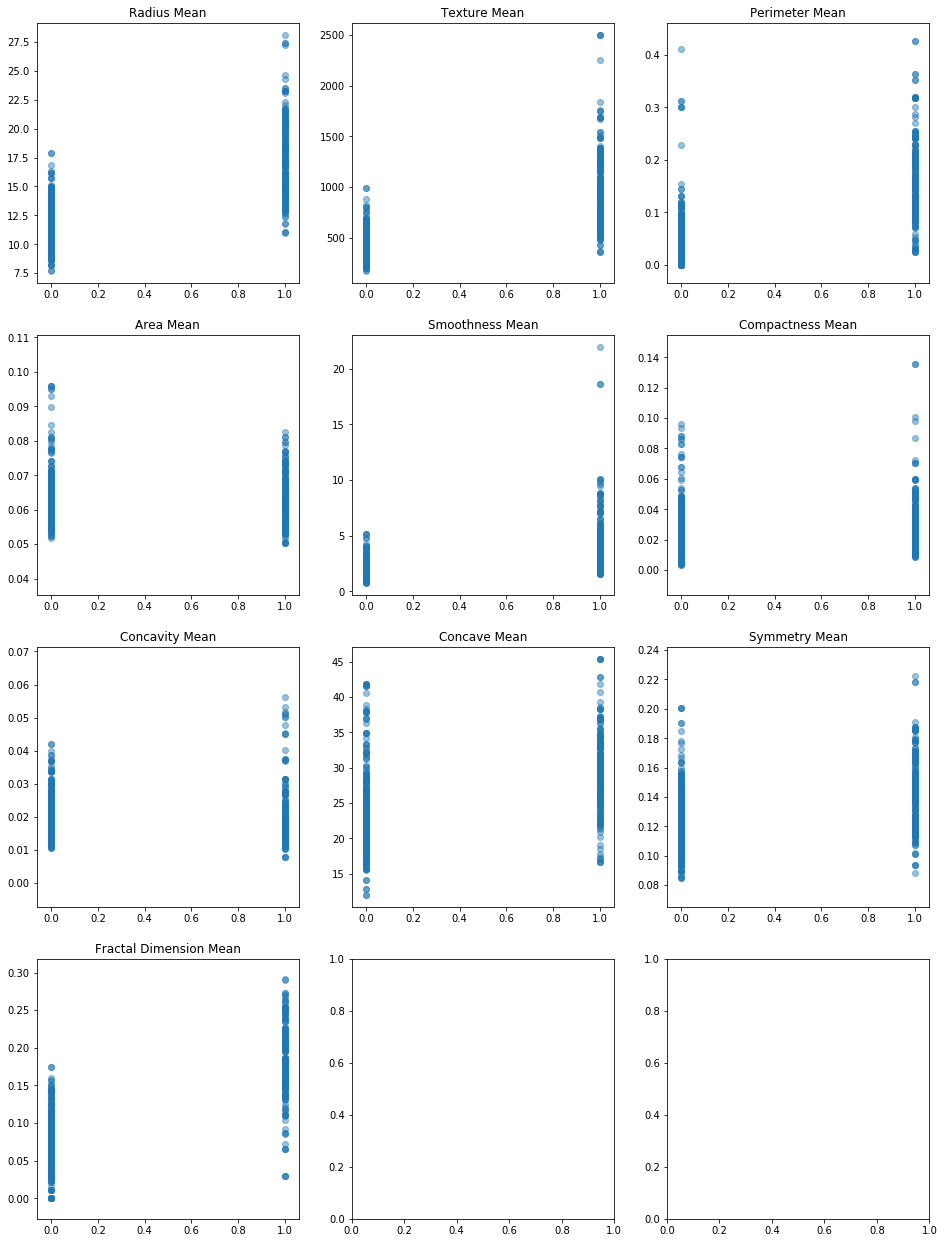

In [78]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9), (ax10, ax11, ax12)) = plt.subplots(4, 3, figsize=(16,22))
ax1.scatter(cancer['diagnosis'], cancer["radius_mean"], alpha=0.45)
ax2.scatter(cancer['diagnosis'], cancer["texture_mean"], alpha=0.45)
ax3.scatter(cancer['diagnosis'], cancer["perimeter_mean"], alpha=0.45)
ax4.scatter(cancer['diagnosis'], cancer["area_mean"], alpha=0.45)
ax5.scatter(cancer['diagnosis'], cancer["smoothness_mean"], alpha=0.45)
ax6.scatter(cancer['diagnosis'], cancer["compactness_mean"], alpha=0.45)
ax7.scatter(cancer['diagnosis'], cancer["concavity_mean"], alpha=0.45)
ax8.scatter(cancer['diagnosis'], cancer["concave_points_mean"], alpha=0.45)
ax9.scatter(cancer['diagnosis'], cancer["symmetry_mean"], alpha=0.45)
ax10.scatter(cancer['diagnosis'], cancer["fractal_dimension_mean"], alpha=0.45);
ax1.set_title("Radius Mean")
ax2.set_title("Texture Mean")
ax3.set_title("Perimeter Mean")
ax4.set_title("Area Mean")
ax5.set_title("Smoothness Mean")
ax6.set_title("Compactness Mean")
ax7.set_title("Concavity Mean")
ax8.set_title("Concave Mean")
ax9.set_title("Symmetry Mean")
ax10.set_title("Fractal Dimension Mean");

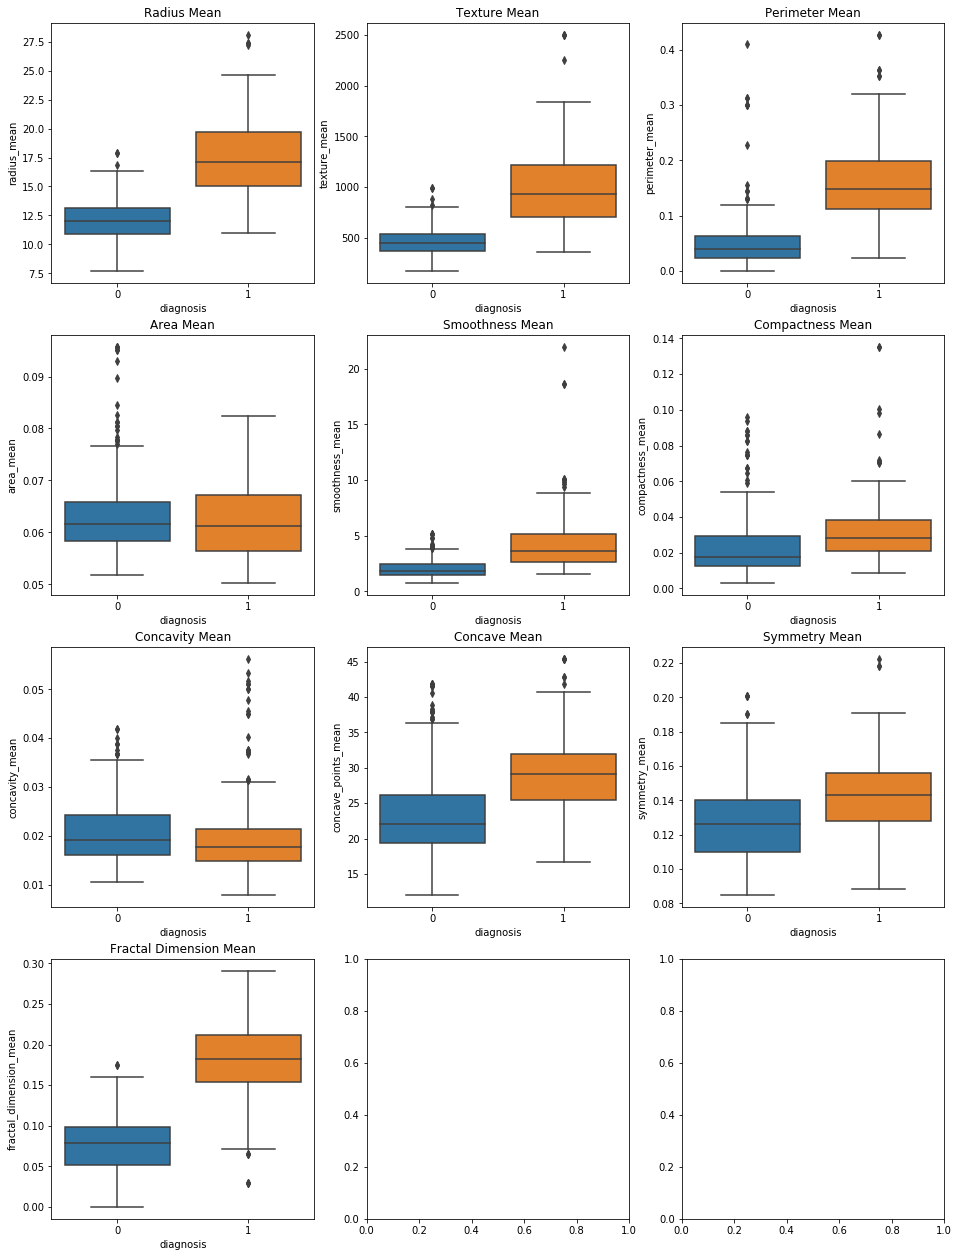

In [77]:
from seaborn import boxplot
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9), (ax10, ax11, ax12)) = plt.subplots(4, 3, figsize=(16,22))
boxplot(y='radius_mean', x='diagnosis', data=cancer, ax=ax1)
boxplot(y='texture_mean', x='diagnosis', data=cancer, ax=ax2)
boxplot(y='perimeter_mean', x='diagnosis', data=cancer, ax=ax3)
boxplot(y='area_mean', x='diagnosis', data=cancer, ax=ax4)
boxplot(y='smoothness_mean', x='diagnosis', data=cancer, ax=ax5)
boxplot(y='compactness_mean', x='diagnosis', data=cancer, ax=ax6)
boxplot(y='concavity_mean', x='diagnosis', data=cancer, ax=ax7)
boxplot(y='concave_points_mean', x='diagnosis', data=cancer, ax=ax8)
boxplot(y='symmetry_mean', x='diagnosis', data=cancer, ax=ax9)
boxplot(y='fractal_dimension_mean', x='diagnosis', data=cancer, ax=ax10)
ax1.set_title("Radius Mean")
ax2.set_title("Texture Mean")
ax3.set_title("Perimeter Mean")
ax4.set_title("Area Mean")
ax5.set_title("Smoothness Mean")
ax6.set_title("Compactness Mean")
ax7.set_title("Concavity Mean")
ax8.set_title("Concave Mean")
ax9.set_title("Symmetry Mean")
ax10.set_title("Fractal Dimension Mean");

In [5]:
cancer.head(3)

,ID,diagnosis,radius_mean,radius_sd_error,radius_worst,texture_mean,texture_sd_error,texture_worst,perimeter_mean,perimeter_sd_error,perimeter_worst,area_mean,area_sd_error,area_worst,smoothness_mean,smoothness_sd_error,smoothness_worst,compactness_mean,compactness_sd_error,compactness_worst,concavity_mean,concavity_sd_error,concavity_worst,concave_points_mean,concave_points_sd_error,concave_points_worst,symmetry_mean,symmetry_sd_error,symmetry_worst,fractal_dimension_mean,fractal_dimension_sd_error,fractal_dimension_worst
0,842302,1,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


## Plot the relationships between the Diagnosis and the Worst value of each feature

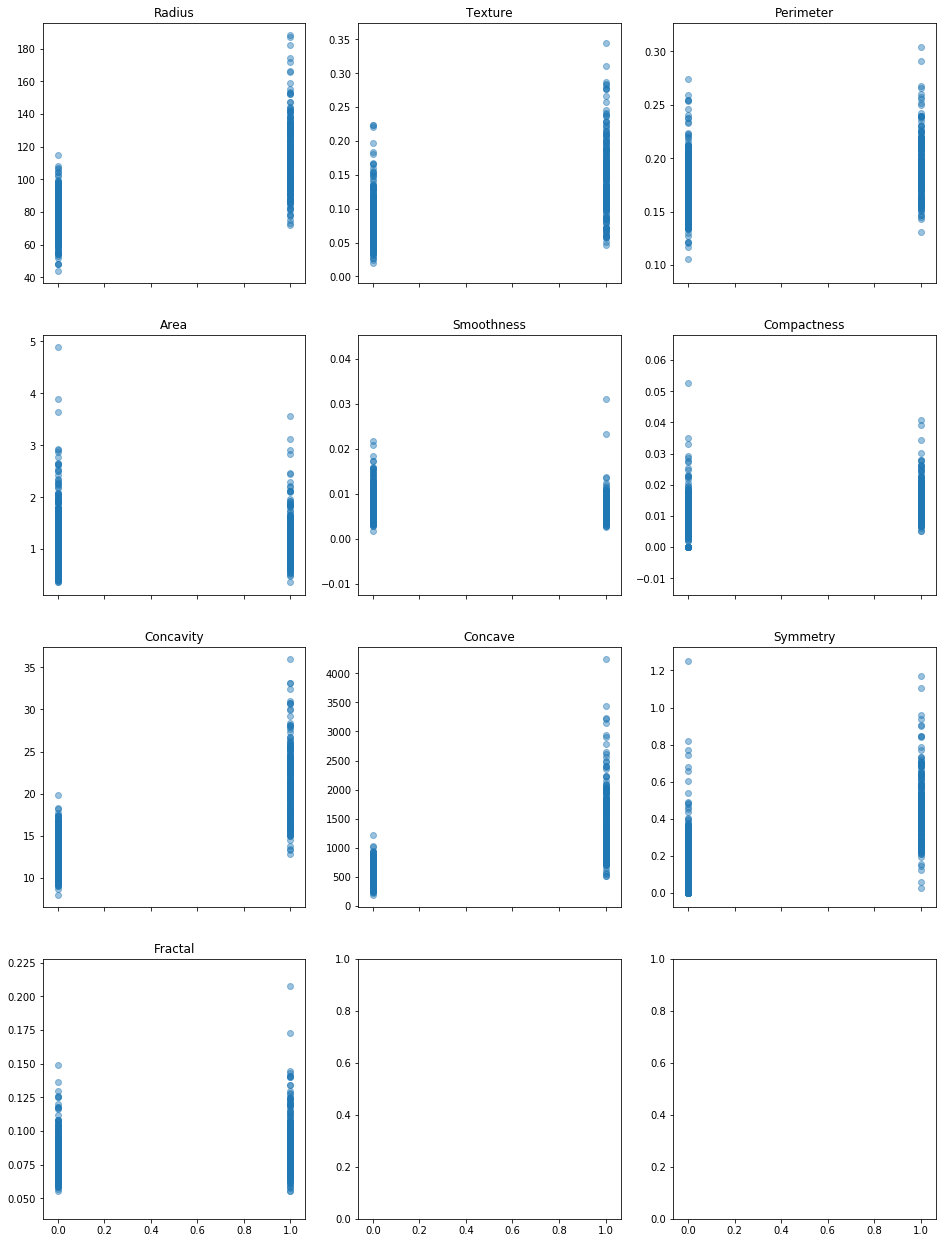

In [14]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9), (ax10, ax11, ax12)) = plt.subplots(4, 3, sharex=True, sharey=False, figsize=(16,22))
ax1.scatter(cancer['diagnosis'], cancer["radius_worst"], alpha=0.45)
ax2.scatter(cancer['diagnosis'], cancer["texture_worst"], alpha=0.45)
ax3.scatter(cancer['diagnosis'], cancer["perimeter_worst"], alpha=0.45)
ax4.scatter(cancer['diagnosis'], cancer["area_worst"], alpha=0.45)
ax5.scatter(cancer['diagnosis'], cancer["smoothness_worst"], alpha=0.45)
ax6.scatter(cancer['diagnosis'], cancer["compactness_worst"], alpha=0.45)
ax7.scatter(cancer['diagnosis'], cancer["concavity_worst"], alpha=0.45)
ax8.scatter(cancer['diagnosis'], cancer["concave_points_worst"], alpha=0.45)
ax9.scatter(cancer['diagnosis'], cancer["symmetry_worst"], alpha=0.45)
ax10.scatter(cancer['diagnosis'], cancer["fractal_dimension_worst"], alpha=0.45);
ax1.set_title("Radius")
ax2.set_title("Texture")
ax3.set_title("Perimeter")
ax4.set_title("Area")
ax5.set_title("Smoothness")
ax6.set_title("Compactness")
ax7.set_title("Concavity")
ax8.set_title("Concave")
ax9.set_title("Symmetry")
ax10.set_title("Fractal");

## Look at how the mean of smoothness, compactness and fractal dimension compares from those diagnosed with breast cancer to those who were classified as benign. 

You can see what appears to be significant difference between the mean value of smoothness and fractal dimension of a malignant tumor vs. that of a benign tumor. The mean value of smoothness on a malignant tumor is more than double that of a benign tumor and the same can be said about the mean of fractal dimension. On the other hand the means of compactness of benign vs. malignant tumors vary by just 0.011. 

In [15]:
cancer.groupby(by="diagnosis")['smoothness_mean', 'compactness_mean', 'fractal_dimension_mean'].agg(['mean'])

,smoothness_mean,compactness_mean,fractal_dimension_mean
,mean,mean,mean
diagnosis,,,
0,2.000321,0.021438,0.074444
1,4.323929,0.032281,0.182237


### Writing a function to bootstrap our data

In [16]:
def bootstrap_data(x):
    x_bootstraped = x.sample(
        n=x.shape[0], # sample of size n
        replace=True,
        random_state=42)
    return x_bootstraped

In [17]:
cancer = bootstrap_data(cancer) # Using the bootstrapping function to bootstrap the cancer DF

In [18]:
y = cancer['diagnosis'] # Setting the target variable which is diagnosis to y
X = cancer.drop(columns='diagnosis') # Setting our features to test to X

In [19]:
ss = StandardScaler() # Instantiate a standard scalar
X_sc = ss.fit_transform(X) # Fit and transform our X variable
# ros = RandomOverSampler(random_state=0) # Instantiate a random oversampler in order to oversample our training set
# X_resampled, y_resampled = ros.fit_resample(X_sc, y) # Fit that oversampler to our X_sc (scaled) and y data
# print(sorted(Counter(y_resampled).items())) # Show the balance btw classes

In [20]:
# Train, test, split
X_train, X_test, y_train, y_test = train_test_split(X_sc, y, random_state=100, test_size=0.25)

# Modeling:
### Here we are going to instantiate a number of different models. I chose the modeling parameters by running each model through a GridSearch below



In [21]:
lr_class = LogisticRegression(penalty='l2', C=0.08902150854450389, solver='liblinear')
knn_class = KNeighborsClassifier(n_neighbors=3, p=4, leaf_size=10)
tree_class = DecisionTreeClassifier(max_features='auto', min_samples_leaf=3, min_samples_split=4, random_state=100)
bag_class = BaggingClassifier(bootstrap=False, max_features=8, max_samples=100, n_estimators=100, random_state=100)
forest_class = RandomForestClassifier(bootstrap=True, max_leaf_nodes=None, min_samples_leaf=3, min_samples_split=8, n_estimators=9, random_state=100)
ada_class = AdaBoostClassifier(learning_rate=0.78, n_estimators=100, random_state=100)
svc = SVC(degree=8, C=2.5, gamma=0.1, kernel='poly', random_state=100)
grad_class = GradientBoostingClassifier(learning_rate=0.08646535029500364, n_estimators=35, min_samples_leaf=3, min_samples_split=7, max_depth=4)

In [22]:
# Make a dictionary of each of the models with a corresponding label
class_models = {
            'lr_class': lr_class, 
            'forest_class': forest_class, 
            'tree_class': tree_class,
            'ada_class': ada_class,            
            'knn_class': knn_class, 
            'bag_class': bag_class, 
            'svc': svc,
            "grad": grad_class
                } 
# Create empty lists to populate with our training and testing predictions
y_pred_test = []
y_pred_train = []

# Writing a for loop to iterate through each of the models above, generate predictions from each model & append to predictions lists
for model in class_models.values():
    model.fit(X_train, y_train)
    y_pred_test.append(model.predict(X_test))
    y_pred_train.append(model.predict(X_train))

y_pred_test = pd.DataFrame(y_pred_test, index=class_models.keys()).T # Turn the list into a DF
y_pred_train = pd.DataFrame(y_pred_train, index=class_models.keys()).T # Turn the list into a DF
print(f'This is the shape of y_test preds {y_pred_test.shape}')
print(f'This is the shape of y_test preds {y_pred_train.shape}')

########### 
# In the line below I am creating a dictionary which will serve as the shell for a DF that will include all of the
# evaluation metrics I want to display for each model: Accuracy, F1-Scores and TP, FP, TN & FN
accuracy = {'train_acc': [], 'test_acc': [], 'F1-train': [], 'F1-test': [], 'true_neg': [], 'fal_pos': [], 'fal_neg': [], 'true_po': []}
for model in class_models.values():
    accuracy['train_acc'].append(model.score(X_train, y_train))
    accuracy['test_acc'].append(model.score(X_test, y_test))
for col in y_pred_test:
    accuracy['F1-train'].append(f1_score(y_train, y_pred_train[col]))
    accuracy['F1-test'].append(f1_score(y_test, y_pred_test[col]))
for col in y_pred_test:
    accuracy['true_neg'].append(confusion_matrix(y_test, y_pred_test[col])[0][0])
    accuracy['fal_pos'].append(confusion_matrix(y_test, y_pred_test[col])[0][1])
    accuracy['fal_neg'].append(confusion_matrix(y_test, y_pred_test[col])[1][0])
    accuracy['true_po'].append(confusion_matrix(y_test, y_pred_test[col])[1][1])
    
accuracy = pd.DataFrame(accuracy, index=class_models.keys())
accuracy

This is the shape of y_test preds (143, 8)
This is the shape of y_test preds (426, 8)


,train_acc,test_acc,F1-train,F1-test,true_neg,fal_pos,fal_neg,true_po
lr_class,0.988263,0.979021,0.985337,0.975207,81,0,3,59
forest_class,0.992958,0.993007,0.991254,0.991870,81,0,1,61
tree_class,0.981221,0.972028,0.976879,0.968254,78,3,1,61
ada_class,1.000000,0.986014,1.000000,0.983607,81,0,2,60
knn_class,0.976526,0.965035,0.970760,0.959350,79,2,3,59
bag_class,0.985915,0.986014,0.982353,0.983607,81,0,2,60
svc,0.976526,0.944056,0.970060,0.932203,80,1,7,55
grad,1.000000,0.993007,1.000000,0.991870,81,0,1,61


## Model Explanation and Evaluation

In the output above you can see that we tested both training and testing accuracy in order to be sure that our model wasn't over fitting. In addition this project is an attempt to look at data from breast cancer patients and determine the best way to be able to classify if someone is likely to have a benign tumor or a tumor that indicates breast cancer (malignant). In this case, we need to look at a few more metrics. The F1-Score is an important metric in this analysis because it compares the harmonic mean between the precision and the recall. To put it more clearly, the F-1 Score is testing to see how well your model does at controlling for both false positives and false negatives. In this can we are very concerned with having a false negative. We do not want to tell a patient that their tumor is benign if it actually is a cancer tumor. You can see above that the models are doing a good job controlling for false negatives. The Adaboost Classifier, Gradient Boosting Classifier, Bagging Classifier and Random Forest Classifier are all producing high accuracy and F1 scores while also having 2 or fewer fals negatives. I have found that with classification problems, these models typically outperform KNN Classifiers and Decision Tree Classifiers, so the result isn't surprising.

The model(s) are looking at all of the parameters that help predict if a cancer tumor is benign vs. Malignant. In order to make the model more precise we could look to create some additional variables using modeling techniques or we could collect additional data on patients. For example it may be useful to have age and other health information like blood pressure, history of cancer in the family etc. These pieces of data could be included in the model to get additional predictiveness. 

In [27]:
# Here is where I will individually Gridsearch through the parameters of each model.
params = {
#     'penalty' : ['l1', 'l2'],
    'min_samples_leaf' : [2, 3],
    'min_samples_split' : [4, 5, 6, 7, 8],
    'n_estimators' : [25, 30, 35, 37],
#     "C" : (np.logspace(-2, 0, 100)),
#     "solver" : ['liblinear']
}
gs = GridSearchCV(
    RandomForestClassifier(), ## <--- This is where I will gridsearch through a different model, 
                                    # I have to manually change the model in order to gridsearch through 
                                    # the specific params for each model
    params,
    cv=3,
    verbose=1,
    return_train_score=False,
    n_jobs=2)
gs.fit(X_train, y_train)
print(gs.best_score_)
print()
print(gs.best_params_)
print()
print(gs.score(X_test, y_test))
pred = model.predict(X_test)
f1_score(y_test, pred)

Fitting 3 folds for each of 40 candidates, totalling 120 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  88 tasks      | elapsed:    5.7s


0.9694835680751174

{'min_samples_leaf': 2, 'min_samples_split': 8, 'n_estimators': 35}

0.993006993006993


[Parallel(n_jobs=2)]: Done 120 out of 120 | elapsed:    7.7s finished


0.991869918699187

# Part II

In [30]:
## EXAMPLE 1 ##
import pandas as pd
import numpy as np
from sklearn import LinearRegression
from sklearn.cross_validation import cross_val_score

# Load data
d = pd.read_csv('../data/train.csv')


# Setup data for prediction
x1 = data.SalaryNormalized
x2 = pd.get_dummies(data.ContractType)

# Setup model
model = LinearRegression() 

# Evaluate model
from sklearn.cross_validation import cross_val_score # You arelready imported this above, there is no need to do it again
from sklearn.cross_validation import train_test_split # Consider importing this with the cross_val_score about for clarity.
scores = cross_val_score(model, x2, x1, cv=1, scoring='mean_absolute_error') ## Consider using more than one CV here. 
print(scores.mean()) 



*ABOVE* : First observation is that you should introduce what you are trying to predict. It seems like you are interested in predicting something in relation to salary but I am a bit unsure.

You are using linear regression so you should by trying to look at some continuous variable. You also need to be sure that you import your model correctly. You line should read  `from sklearn.model_selection import LinearRegression`. 

It looks like that variable is SalaryNormalized? Should that variable be labeled as `y` for clarity? 

I noticed that you imported `train_test_split` but you actually didn't train test split your data. 

You have instantiated the Linear Regression model but didn't actually fit you data to the model nor did you generate predictions. It would probably be ideal to generate predictions and compare them to a testing set that you created from using `train_test_split` on your data set. Then you can calculate some residuals and see how the model is performing. 

Additionally as stated above you only did `cv=1` above, this means that you are only cross validating on one sample of your data so it doesn't even matter if you take the mean of your scores at the end. The mean is just going to be equivalent to your one score from your one CV. 

Finally, did you do any EDA? Did you take a look at what variables might be associated with Salary. It would be good to visualize your data a bit before you go ahead and model it. 

Let's make sure that we schedule a time that we can meet so that we can go over this problem more thoroughly. I want to be sure that you understand it before we move on to more complicated topics.

In [ ]:
## EXAMPLE 2 ##
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import cross_val_score

# Load data
data = pd.read_csv('../data/train.csv')


# Setup data for prediction
y = data.SalaryNormalized
X = pd.get_dummies(data.ContractType)

# Setup model
model = LinearRegression()

# Evaluate model
scores = cross_val_score(model, X, y, cv=5, scoring='mean_absolute_error')
print(scores.mean())


*ABOVE* : The first thing I noticed is that you didn't train test split your data at all. So you are using all of your data to train the linear regression model. Was this intentional? Do you have another set of data that you can use to test the models performance? 

Have you overfit this model to the entire data set? It seems like you will have trouble evaluating this without a testing data set. Also You could consider actually fitting the model to the data in order to generate some predictions, calculate some residuals and then perhaps even plot the residuals to evaluate how the model is performing. 

I also would have considered doing so EDA before. What is happening in the data set? What are you viewing? I think that there are lots of additional steps you can take to get a much better sense as to what a reasonable model might look like. I'd love to schedule some time with you so that we can go through this step by step. I want to ensure that you understand what's happening before we move on.